In [1]:
import numpy as np
np.set_printoptions(suppress=True, precision=4)
import sys
import matplotlib.pyplot as plt
import sklearn.decomposition as decomp
import sklearn.linear_model as linear_model
import sklearn.datasets as sk_data
from sklearn.preprocessing import StandardScaler
import numpy.linalg as nla
import sklearn.svm as svm
import pandas as pd
from scipy.io import loadmat
from pymatreader import read_mat
#import test-train split
from sklearn.model_selection import train_test_split
#import Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
import seaborn as sns

In [2]:
H=pd.read_csv('/Users/inria/Desktop/M/TwinHouse.csv',sep=';',header=None)
W=pd.read_csv('/Users/inria/Desktop/M/TwinWeather.csv',sep=';',header=None)

In [3]:
# Inputs
Ti2 = H[7];    # temperature in living room at 187 cm (output)
Ti1=H[6];      # temperature in living room at 125 cm
Ti=H[5];     #temperature in living room at 67cm
Tk = H[11];   # kitchen
Td = H[12];   # doorway
Tcr = H[8];    # corridor
Tchl = H[10];  # Children room
Tb=H[13];    #Bed room
Ta = H[3];    # attic
Tg = H[4];    # cellar
Tv = H[29];   # ventilation supply air 
To = W[2];    # outdoor
Qn = W[5];    # Solar radiations from north
Qs = W[7];    # specific global solar vert. South
Qw = W[8];    # specific global solar vert. West
Qi = H[20];   # el. power living
Qk=H[23]+H[24]; #Kithcne power input minus duct losses
Qd=H[25]; #Doorway Heater
QB=H[26]; #Bedroom Heater

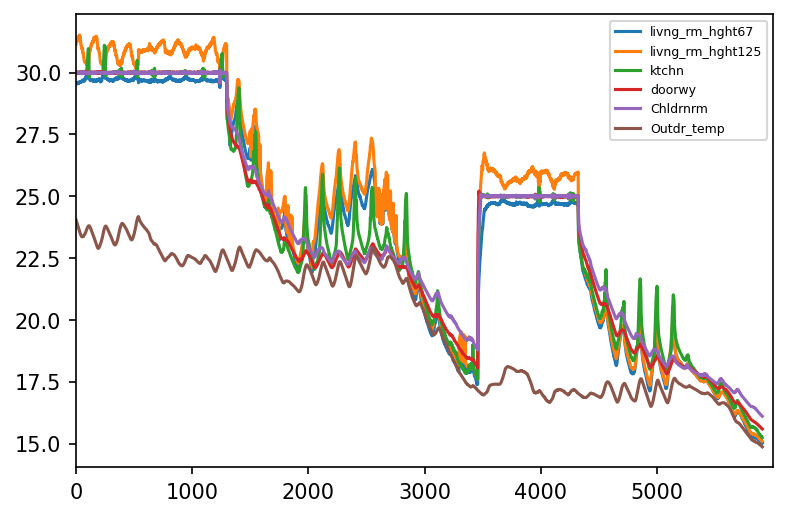

In [4]:
plt.figure(dpi=150)
plt.plot(Ti,label='livng_rm_hght67')
plt.plot(Ti2,label='livng_rm_hght125')
plt.plot(Tk,label='ktchn')
plt.plot(Td,label='doorwy')
plt.plot(Tb,label='Chldrnrm')
plt.plot(Ta,label='Outdr_temp')
#plt.axvline(x=1300,linestyle=':')
#plt.axvline(x=3500,linestyle=':')
plt.xlim(0,6000)
plt.xticks((np.arange(0,6000,1000)))
plt.legend(prop=dict(size=6))
plt.rcParams['legend.title_fontsize'] = 'xx-small'
plt.savefig('Exp_temp.png')
plt.show()

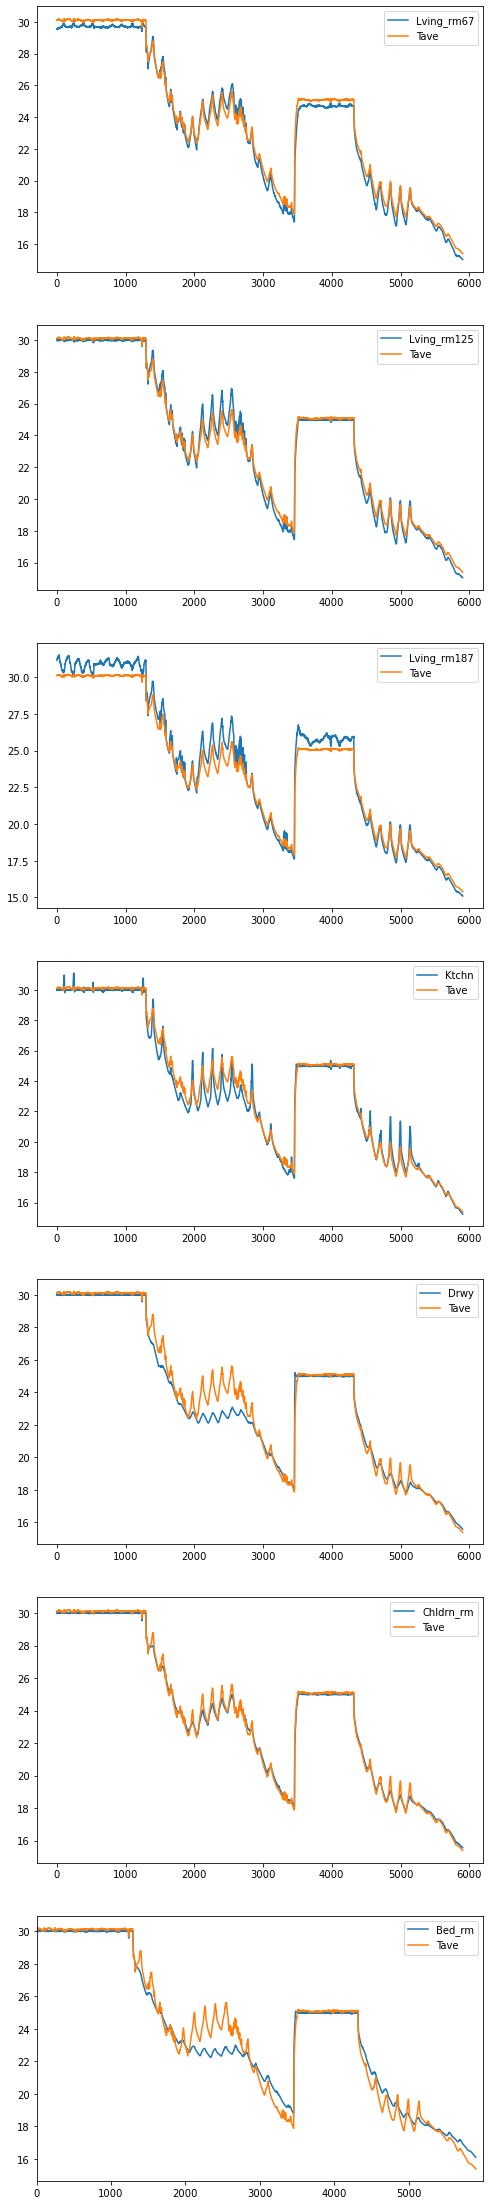

In [5]:
#plt.figure(figsize=(8,20))
fig,ax=plt.subplots(nrows=7,ncols=1,figsize=(8,40))
Tave=(Ti+Ti1+Ti2+Tk+Tcr+Tchl+Tb)/7
lab=['Lving_rm67','Lving_rm125','Lving_rm187','Ktchn','Drwy','Chldrn_rm','Bed_rm']
T=[Ti,Ti1,Ti2,Tk,Td,Tchl,Tb]
for i in range(0,7,1):
#plt.plot(Tave,label='Tav.lvngrm')
    ax[i].plot(T[i],label=lab[i])
    ax[i].plot(Tave,label='Tave')
    ax[i].legend()
    #plt.show()
    #ax[2].plot(abs(Ti),label='livngrm67')
#ax[3].plot(abs(Tk),label='Ktch')
#ax[4].plot(abs(Tchl),label='Chld')
#ax[5].plot(abs(Tb),label='bdrm')
#ax[6].plot(abs(Tcr),label='livngrm_hght67')
#ax[6].plot(Tave,label='Tave')
#plt.plot(Ta,label='Outdr_temp')
plt.xlim(0,6000)
plt.xticks((np.arange(0,6000,1000)))
plt.legend()
plt.show()

#plt.title('The tempeartures recodrded by sensors at different hieghts in the same room')
#plt.savefig('Exp_temp1.png')

#print(sum(abs(Ti-Tave)))

In [9]:
lab[1]

'Lving_rm125'

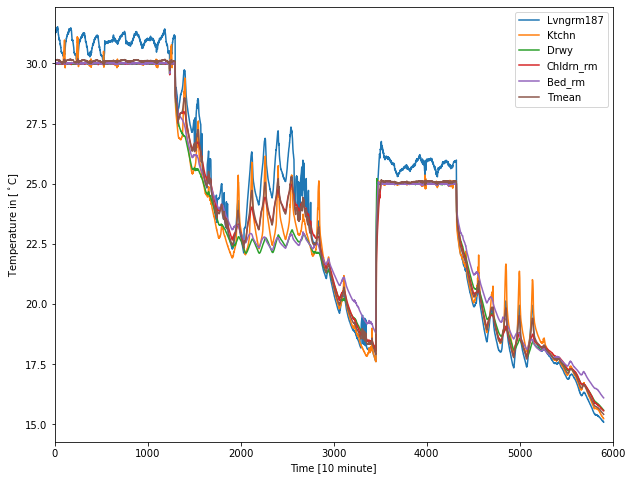

In [20]:
df=pd.DataFrame([Ti,Ti1,Ti2,Tk,Td,Tcr,Tchl,Tb]).transpose()
df['14']=df.mean(axis=1)
df.columns=['Lvngrm67','Lvngrm125','Lvngrm187','Ktchn','Drwy','crrdr','Chldrn_rm','Bed_rm','Tmean']

df.plot(y=['Lvngrm187','Ktchn','Drwy','Chldrn_rm','Bed_rm','Tmean'],xlim=(0,6000),figsize=(10,8))
plt.ylabel('Temperature in [$^\circ$C]')
plt.xlabel('Time [10 minute]')
plt.savefig('AverageTemp2',dpi=300)
plt.tight_layout
plt.show()

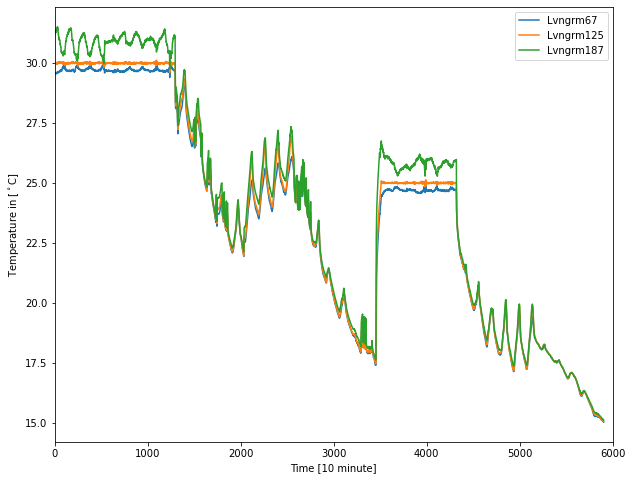

In [21]:
df=pd.DataFrame([Ti,Ti1,Ti2,Tk,Td,Tcr,Tchl,Tb]).transpose()
df['14']=df.mean(axis=1)
df.columns=['Lvngrm67','Lvngrm125','Lvngrm187','Ktchn','Drwy','crrdr','Chldrn_rm','Bed_rm','Tmean']

df.plot(y=['Lvngrm67','Lvngrm125','Lvngrm187'],xlim=(0,6000),figsize=(10,8))
plt.ylabel('Temperature in [$^\circ$C]')
plt.xlabel('Time [10 minute]')
plt.savefig('AverageTemp3',dpi=300)
plt.tight_layout
plt.show()

In [7]:
df

,Lvngrm67,Lvngrm125,Lvngrm187,Ktchn,Drwy,crrdr,Chldrn_rm,Bed_rm,Tmean
0,29.531048,29.986008,31.134912,29.986731,30.012228,30.049305,29.997070,30.000942,30.087281
1,29.547962,30.000132,31.157990,29.994390,29.999079,30.057949,30.006847,29.998449,30.095350
2,29.546320,29.972891,31.184851,30.008350,29.985352,30.067911,30.002213,30.000271,30.096020
3,29.556202,29.984280,31.223591,29.993240,30.002310,30.070709,30.000031,30.006247,30.104576
4,29.553158,29.997700,31.257040,30.005650,30.023932,30.071751,30.007252,30.000439,30.114615
...,...,...,...,...,...,...,...,...,...
5900,15.052640,15.071091,15.117129,15.262601,15.604040,15.695460,15.581810,16.120953,15.438216
5901,15.049970,15.061041,15.116321,15.260260,15.601132,15.693260,15.573151,16.118481,15.434202
5902,15.031240,15.060422,15.117849,15.256880,15.598860,15.690831,15.571490,16.113010,15.430073
5903,15.033789,15.054210,15.108339,15.253000,15.593478,15.687030,15.560300,16.107492,15.424705


In [15]:
# We create categories for Hot, Cold and Normal temperatures
category=pd.cut(df.Tmean,bins=[0,28,30,32],labels=['Normal','Hot','TooHot'])
#Insert the new category at 4th column
df.insert(9,'TEMP',category)
df

,Lvngrm67,Lvngrm125,Lvngrm187,Ktchn,Drwy,crrdr,Chldrn_rm,Bed_rm,Tmean,TEMP
0,29.531048,29.986008,31.134912,29.986731,30.012228,30.049305,29.997070,30.000942,30.087281,TooHot
1,29.547962,30.000132,31.157990,29.994390,29.999079,30.057949,30.006847,29.998449,30.095350,TooHot
2,29.546320,29.972891,31.184851,30.008350,29.985352,30.067911,30.002213,30.000271,30.096020,TooHot
3,29.556202,29.984280,31.223591,29.993240,30.002310,30.070709,30.000031,30.006247,30.104576,TooHot
4,29.553158,29.997700,31.257040,30.005650,30.023932,30.071751,30.007252,30.000439,30.114615,TooHot
...,...,...,...,...,...,...,...,...,...,...
5900,15.052640,15.071091,15.117129,15.262601,15.604040,15.695460,15.581810,16.120953,15.438216,Normal
5901,15.049970,15.061041,15.116321,15.260260,15.601132,15.693260,15.573151,16.118481,15.434202,Normal
5902,15.031240,15.060422,15.117849,15.256880,15.598860,15.690831,15.571490,16.113010,15.430073,Normal
5903,15.033789,15.054210,15.108339,15.253000,15.593478,15.687030,15.560300,16.107492,15.424705,Normal


In [9]:
df.iloc[:,:8][(0<df.iloc[:,:8]) & (df.iloc[:,:8]<16)].count()

Lvngrm67     171
Lvngrm125    169
Lvngrm187    165
Ktchn        138
Drwy         102
crrdr         77
Chldrn_rm    111
Bed_rm         0
dtype: int64

In [26]:
#Reduce the number of sensors
results_all=[]
y=str(df.iloc[0,6])
# An array equal to the reducing number of digits after decimal
y=np.array(range(y[::-1].find('.'),2,-1))
for z in y:
    df.iloc[:,:8].round(z)
    results_samp=[]
    #change the sampling rate
    for i in np.array(range(df.shape[0],1000,-24*6*10)):
        df1=df.sample(i)
        results_sns=[]
        #Reduce the number of sensors
        for c in np.array(range(1,df1.shape[1]-1,1)):
            X_train,X_test,y_train,y_test=train_test_split(df1.iloc[:,:c],df1.TEMP,test_size=0.4,random_state=101)
            #X_train=np.array(df1.iloc[0:2000,c]).reshape(-1,1)
            #y_train=df1.TEMP[0:2000]
            #y_test=df1.TEMP[2001:]
            #X_test=np.array(df1.iloc[2001:,c]).reshape(-1,1)
            #Apply fitting of the data
            logmodel=LogisticRegression(multi_class='multinomial',solver='lbfgs',max_iter=10000)
            result=logmodel.fit(X_train,y_train)
            #Predict the new values
            predictions=logmodel.predict(X_test)
            results_sns.append(metrics.f1_score(y_test,predictions,average=None)[0])
        results_samp.append(results_sns)
    results_all.append(results_samp)

In [22]:
np.array(range(1,df1.shape[1]-1,1))

array([1, 2, 3, 4, 5, 6, 7, 8])

In [22]:
rs=pd.DataFrame(results_all)
rs

,0,1,2,3
0,"[0.45714285714285713, 0.6285714285714286, 0.62...","[0.25925925925925924, 0.5185185185185185, 0.55...","[0.35, 0.5, 0.6, 0.5, 0.55, 0.55, 0.55, 0.6]","[0.2, 0.4, 0.5, 0.5, 0.6, 0.6, 0.6, 0.6]"
1,"[0.3448275862068966, 0.5862068965517241, 0.586...","[0.4090909090909091, 0.6363636363636364, 0.727...","[0.23076923076923078, 0.46153846153846156, 0.5...","[0.4, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8]"
2,"[0.42105263157894735, 0.631578947368421, 0.631...","[0.375, 0.4166666666666667, 0.4166666666666667...","[0.125, 0.5, 0.5625, 0.5625, 0.625, 0.625, 0.6...","[0.0, 0.0, 0.0, 0.6666666666666666, 0.66666666..."


In [23]:
x=np.array(results_all)
index=pd.MultiIndex.from_product([range(s) for s in x.shape],names=['X','Y','Z'])
rs = pd.DataFrame({'x': x.flatten()}, index=index)['x']
rs = rs.unstack(level='X').swaplevel().sort_index()
rs.columns = ['Comp_1', 'Comp_2', 'Comp_3']
rs.index.names = ['Sensors','Sampling Rate']
rs.index.set_levels([ 
                       ['1','2','3','4','5','6','7','8'],['5905','4465','3025','1585']], inplace=True)


/var/folders/0b/f9crck810477r2yg4k9mg_dc0000gp/T/ipykernel_3459/4112507617.py:7: FutureWarning: inplace is deprecated and will be removed in a future version.
  rs.index.set_levels([


In [24]:
rs

Comp_1    Comp_2    Comp_3
Sensors Sampling Rate                              
1       5905           0.457143  0.344828  0.421053
        4465           0.259259  0.409091  0.375000
        3025           0.350000  0.230769  0.125000
        1585           0.200000  0.400000  0.000000
2       5905           0.628571  0.586207  0.631579
        4465           0.518519  0.636364  0.416667
        3025           0.500000  0.461538  0.500000
        1585           0.400000  0.800000  0.000000
3       5905           0.628571  0.586207  0.631579
        4465           0.555556  0.727273  0.416667
        3025           0.600000  0.538462  0.562500
        1585           0.500000  0.800000  0.000000
4       5905           0.714286  0.689655  0.736842
        4465           0.592593  0.818182  0.541667
        3025           0.500000  0.615385  0.562500
        1585           0.500000  0.800000  0.666667
5       5905           0.742857  0.793103  0.789474
        4465           0.629630  0.818182  0.708333
        3025           0.550000  0.692308  0.625000
        1585           0.600000  0.800000  0.666667
6       5905           0.742857  0.793103  0.789474
        4465           0.629630  0.772727  0.708333
        3025           0.550000  0.692308  0.625000
        1585           0.600000  0.800000  0.666667
7       5905           0.742857  0.793103  0.789474
        4465           0.629630  0.772727  0.708333
        3025           0.550000  0.692308  0.625000
        1585           0.600000  0.800000  0.666667
8       5905           0.742857  0.793103  0.789474
        4465           0.629630  0.818182  0.708333
        3025           0.600000  0.692308  0.687500
        1585           0.600000  0.800000  0.666667

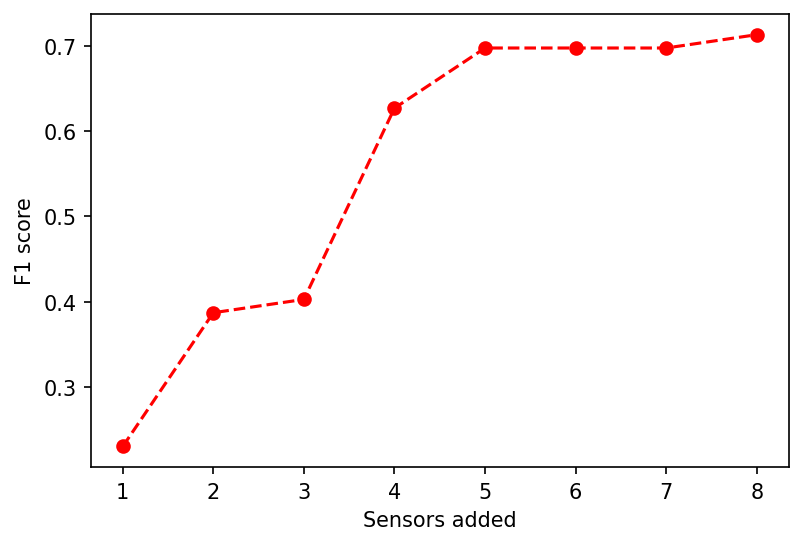

In [25]:
fig,axes=plt.subplots(dpi=150)
axes.plot(rs.groupby('Sensors').mean().index,rs.groupby('Sensors').mean().Comp_3,linestyle='dashed',marker='o',color='r')
#plt.xticks(rotation=30)
plt.ylabel('F1 score')
plt.xlabel('Sensors added')
plt.savefig('sensors2.png')
plt.show()


In [42]:
rs.groupby('Sampling Rate').mean().round(3)

,Comp_1,Comp_2,Comp_3
Sampling Rate,,,
5905,0.809,0.811,0.838
4465,0.748,0.716,0.895
3025,0.657,0.771,0.598
1585,0.708,0.743,0.540


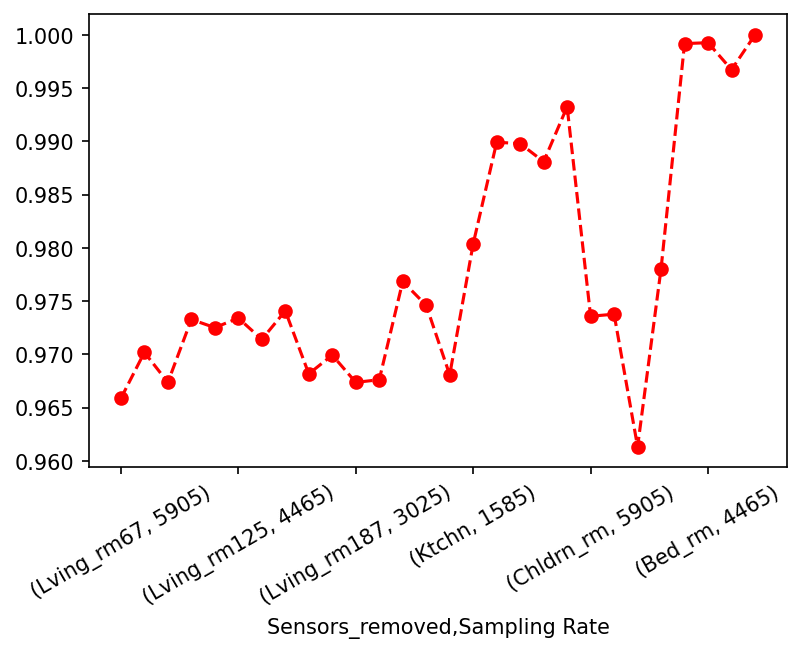

In [167]:
plt.figure(dpi=150)
rs.Comp_1.plot(linestyle='dashed',marker='o',color='red')
plt.xticks(rotation=30)
plt.show()

In [90]:
rs.iloc[:,0]

Sensors_removed  Sampling Rate
Lving_rm67       5905             0.973075
                 4465             0.974543
                 3025             0.965746
                 1585             0.958971
Lving_rm125      5905             0.981939
                 4465             0.981207
                 3025             0.983200
                 1585             0.973868
Lving_rm167      5905             0.968782
                 4465             0.964401
                 3025             0.960633
                 1585             0.954044
Ktchn            5905             0.973317
                 4465             0.973017
                 3025             0.975734
                 1585             0.971470
Drwy             5905             0.989494
                 4465             0.989899
                 3025             0.991119
                 1585             0.984347
Chldrn_rm        5905             0.974480
                 4465             0.974526
                 3025  